In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('wine_data.csv',header=None)


In [3]:
df.shape

(178, 14)

In [4]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [5]:
df.columns

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13], dtype='int64')

In [6]:
df=pd.read_csv('wine_data.csv',usecols=[0,1,2])
df.columns=['Class label', 'Alcohol', 'Malic acid']

In [7]:
df.head()

,Class label,Alcohol,Malic acid
0,1,13.20,1.78
1,1,13.16,2.36
2,1,14.37,1.95
3,1,13.24,2.59
4,1,14.20,1.76


In [8]:
X=df.drop('Class label',axis=1)
Y=df['Class label']

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [11]:
print(x_train.shape)
print(x_test.shape)

(141, 2)
(36, 2)


In [12]:
from sklearn.preprocessing import MinMaxScaler

In [13]:
scaler=MinMaxScaler()

In [14]:
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [15]:
x_train_scaled=pd.DataFrame(x_train_scaled,columns=x_train.columns)
x_test_scaled=pd.DataFrame(x_test_scaled,columns=x_test.columns)

In [16]:
x_train_scaled

,Alcohol,Malic acid
0,0.715054,0.482688
1,0.338710,0.395112
2,0.387097,0.128310
3,0.637097,0.615071
4,0.543011,0.236253
...,...,...
136,0.397849,0.171079
137,0.620968,0.010183
138,0.467742,0.517312
139,0.825269,0.230143


In [17]:
print('Before Scalindg the data is \n' ,x_train.describe())


Before Scalindg the data is 
           Alcohol  Malic acid
count  141.000000  141.000000
mean    12.971631    2.345603
std      0.783095    1.134943
min     11.030000    0.890000
25%     12.340000    1.600000
50%     13.050000    1.880000
75%     13.620000    3.120000
max     14.750000    5.800000


In [18]:
print('After Scalindg the data is \n',x_train_scaled.describe())

After Scalindg the data is 
           Alcohol  Malic acid
count  141.000000  141.000000
mean     0.521944    0.296457
std      0.210509    0.231149
min      0.000000    0.000000
25%      0.352151    0.144603
50%      0.543011    0.201629
75%      0.696237    0.454175
max      1.000000    1.000000


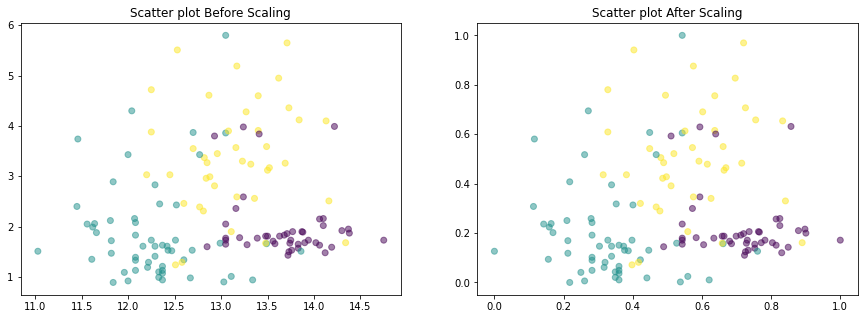

In [19]:
fig,ax=plt.subplots(1,2,figsize=(15,5))

ax[0].scatter(x_train['Alcohol'],x_train['Malic acid'],alpha=0.5,c=y_train)
ax[0].set_title('Scatter plot Before Scaling')

# after scaling
ax[1].scatter(x_train_scaled['Alcohol'],x_train_scaled['Malic acid'],alpha=0.5,c=y_train)
ax[1].set_title('Scatter plot After Scaling')

plt.show()


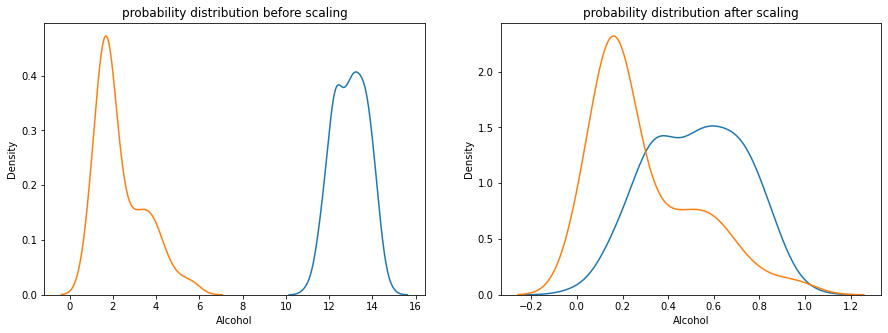

In [20]:
fig,ax=plt.subplots(1,2,figsize=(15,5))

sns.kdeplot(x_train['Alcohol'],ax=ax[0])
sns.kdeplot(x_train['Malic acid'],ax=ax[0])
ax[0].set_title('probability distribution before scaling')

sns.kdeplot(x_train_scaled['Alcohol'],ax=ax[1])
sns.kdeplot(x_train_scaled['Malic acid'],ax=ax[1])
ax[1].set_title('probability distribution after scaling')

plt.show()


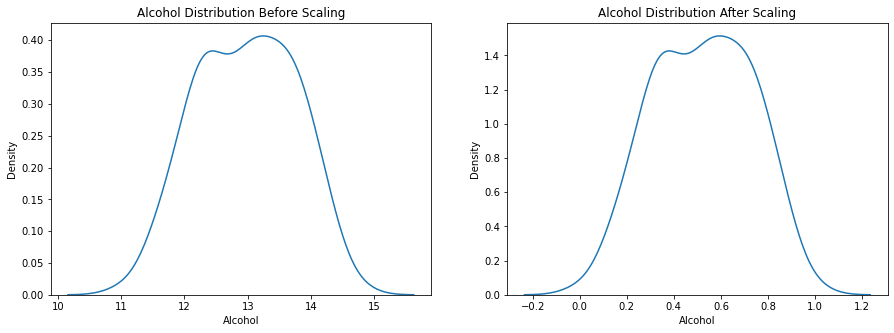

In [21]:
fig,ax=plt.subplots(1,2,figsize=(15,5))

sns.kdeplot(x_train['Alcohol'],ax=ax[0])
ax[0].set_title('Alcohol Distribution Before Scaling')

sns.kdeplot(x_train_scaled['Alcohol'],ax=ax[1])
ax[1].set_title('Alcohol Distribution After Scaling')

plt.show()